# Módulo 10: Árvores de Regressão

# Exercício 2

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [177]:
# importando bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz

from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split


%matplotlib inline

In [178]:
# carregando arquivo e construindo DataFrame

arquivo = pd.read_csv('boston.csv')
df_boston = pd.DataFrame(arquivo)

In [179]:
# divisão dos dados em y e X

y = df_boston.MEDV
X = df_boston.drop('MEDV',axis=1)


In [180]:
# informações sobre os dados

df_boston.dtypes


CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [181]:
# correlação entre as variáveis

correlacao = df_boston.corr()
correlacao


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


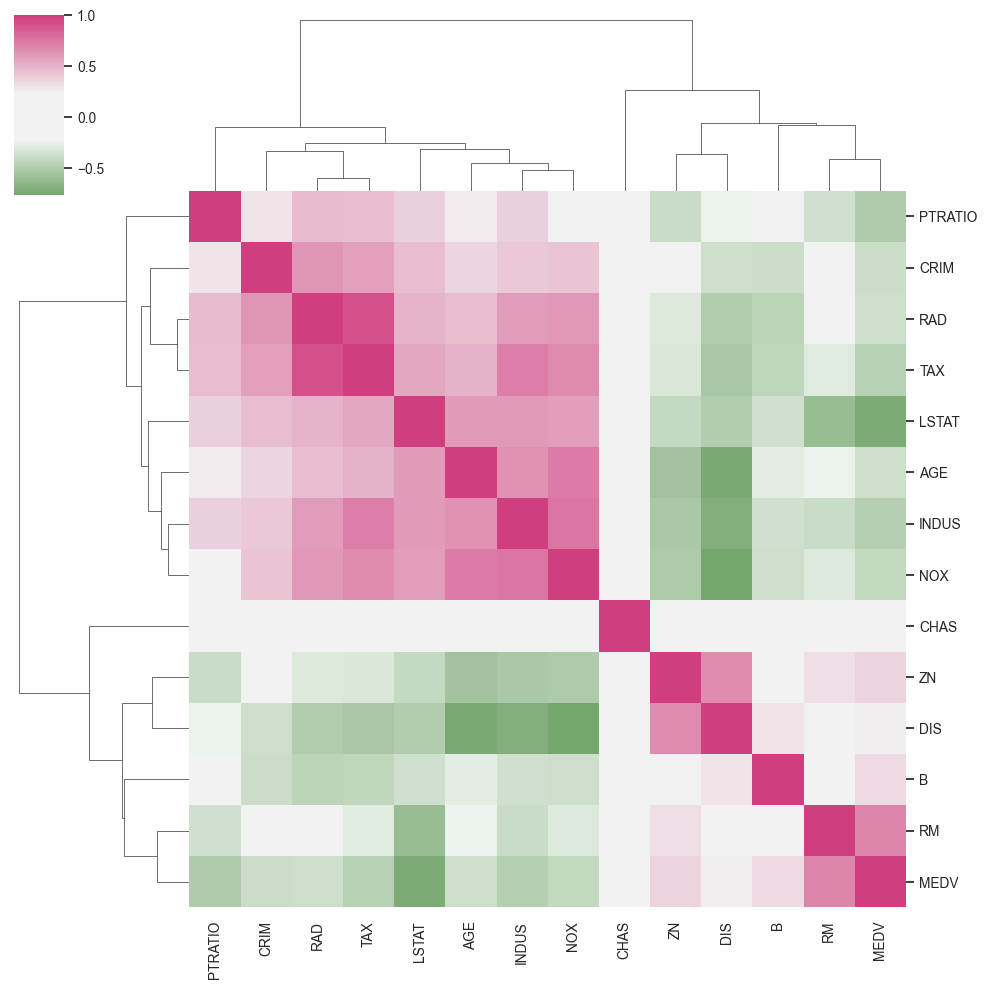

In [182]:
# visualuzação da matriz de correlação de variáveis

cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')
sns.clustermap(df_boston.corr(), figsize=(10, 10), center = 0, cmap=cmap)

In [183]:
# separando os dados em "treino" e "teste"

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [184]:
# TREINANDO as duas árvores de regressão

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [185]:
# TESTANDO as duas árvores de regressão

regr_3 = DecisionTreeRegressor(max_depth=2)
regr_4 = DecisionTreeRegressor(max_depth=8)

regr_3.fit(X_test, y_test)
regr_4.fit(X_test, y_test)

DecisionTreeRegressor(max_depth=8)

In [186]:
# Fazer previsões nos conjuntos de treinamento usando as árvores treinadas

y_pred_train_1 = regr_1.predict(X_train)
y_pred_train_2 = regr_2.predict(X_train)


print("Previsões com regr_1:")
print(y_pred_train_1[:5])

print("\nPrevisões com regr_2:")
print(y_pred_train_2[:5])


Previsões com regr_1:
[23.03048128 23.03048128 14.76126126 32.28857143 23.03048128]

Previsões com regr_2:
[21.66326531 21.66326531 14.4        35.925      21.66326531]


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [187]:
# CCP e o caminho da árvore | impureza = MCE
# regr_2 = max_depth=8   |  usando base de treinamento

caminho_arvore = regr_2.cost_complexity_pruning_path(X_train, y_train) 
caminho_arvore

{'ccp_alphas': array([0.00000000e+00, 5.64971751e-05, 5.64971751e-05, 6.35593220e-05,
        2.25988701e-04, 3.53107345e-04, 4.61393597e-04, 6.77966102e-04,
        6.92090395e-04, 6.92090395e-04, 7.62711864e-04, 1.41242938e-03,
        1.41242938e-03, 1.70903955e-03, 2.07627119e-03, 2.28813559e-03,
        2.88370998e-03, 2.94256121e-03, 3.05084746e-03, 3.17796610e-03,
        3.95951036e-03, 4.52448211e-03, 4.76694915e-03, 5.12711864e-03,
        6.15254237e-03, 6.92090395e-03, 7.47175141e-03, 7.68989328e-03,
        7.91431262e-03, 7.91902072e-03, 7.95668550e-03, 8.60909335e-03,
        9.18432203e-03, 9.64218456e-03, 9.79661017e-03, 1.10734463e-02,
        1.10746234e-02, 1.27120662e-02, 1.35969868e-02, 1.44632768e-02,
        1.53813559e-02, 1.59130571e-02, 1.90960452e-02, 2.35310734e-02,
        2.37570621e-02, 2.38265626e-02, 2.44067797e-02, 2.64500942e-02,
        2.65762712e-02, 2.71509282e-02, 2.71939736e-02, 2.92658730e-02,
        3.07793023e-02, 3.08898305e-02, 3.35111563

Text(0, 0.5, 'Impureza total das folhas')

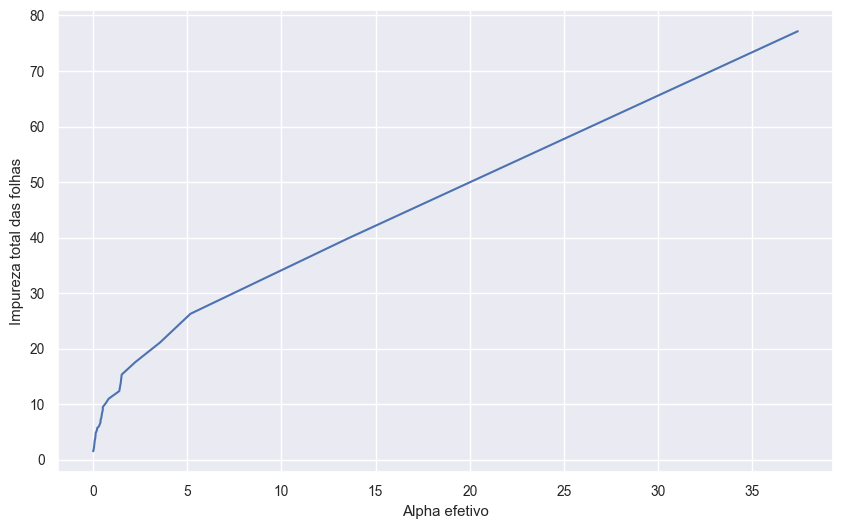

In [188]:
# impureza da árvore em função do Alpha

ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

### 3. Faça cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [189]:
# treine uma árvore com seu respectivo alpha e guarde em uma lista
# todas as árvores diferentes com os respectivos ccps 

clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

Text(0, 0.5, 'Profundidade da árvore')

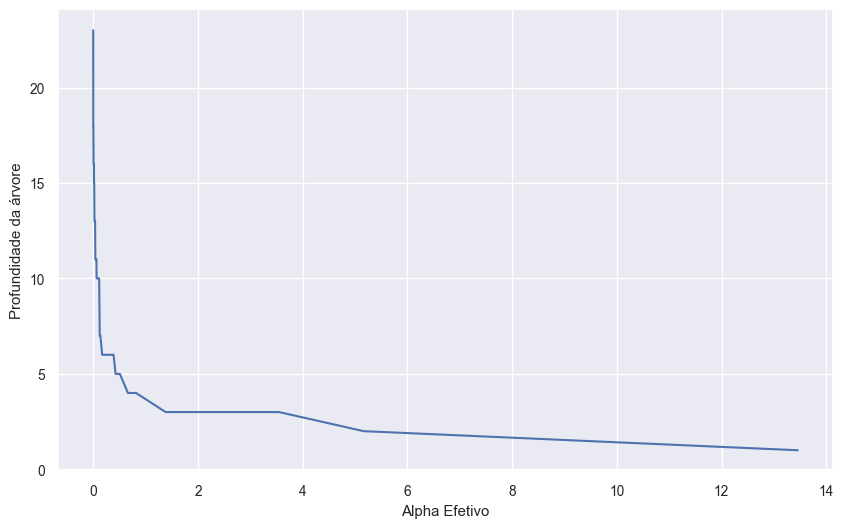

In [190]:
# imprimindo as árvores e suas respectivas profundidades

tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("Alpha Efetivo")
plt.ylabel("Profundidade da árvore")

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [191]:
# MCE da árvore em função do alpha

train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]


### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

<Figure size 1000x500 with 0 Axes>

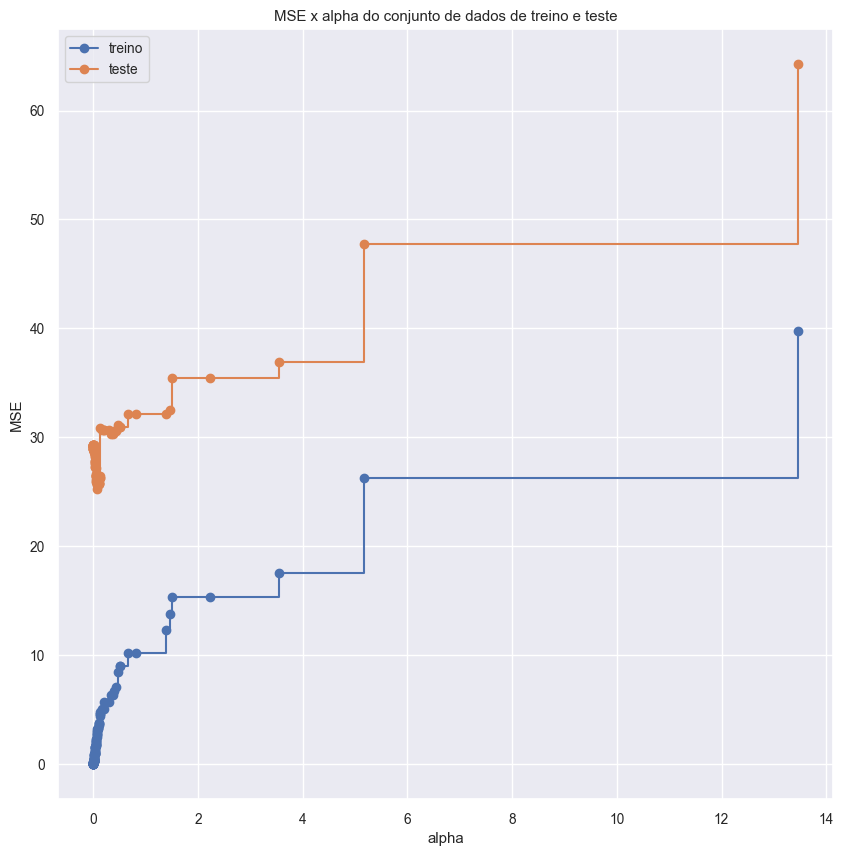

In [192]:
# gráfico MSE x Alpha

plt.figure(figsize=(10, 5))
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

# TREINO: quanto maior o Alpha maior o erro e as árvores vão ficando pior;
# TESTE: quanto menor o Alpha em relação ao MSE o erro dimunue | isso é overfitting

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [193]:
# o valor escolhido é o menor Alpha ou ponto ótimo que é um valor perto de zero

arvore_final = DecisionTreeRegressor(random_state = 0, ccp_alpha = 0.03)
arvore_final.fit(X_train, y_train)

print(f'Produndidade: {arvore_final.max_depth}')
print(f'R-quadrado: {arvore_final.score(X_test, y_test): .2f}')
print(f'MSE base de testes: {mean_squared_error(y_test, arvore_final.predict(X_test )):.2f}')

Produndidade: None
R-quadrado:  0.72
MSE base de testes: 28.26


### 7. Visualize esta árvore.

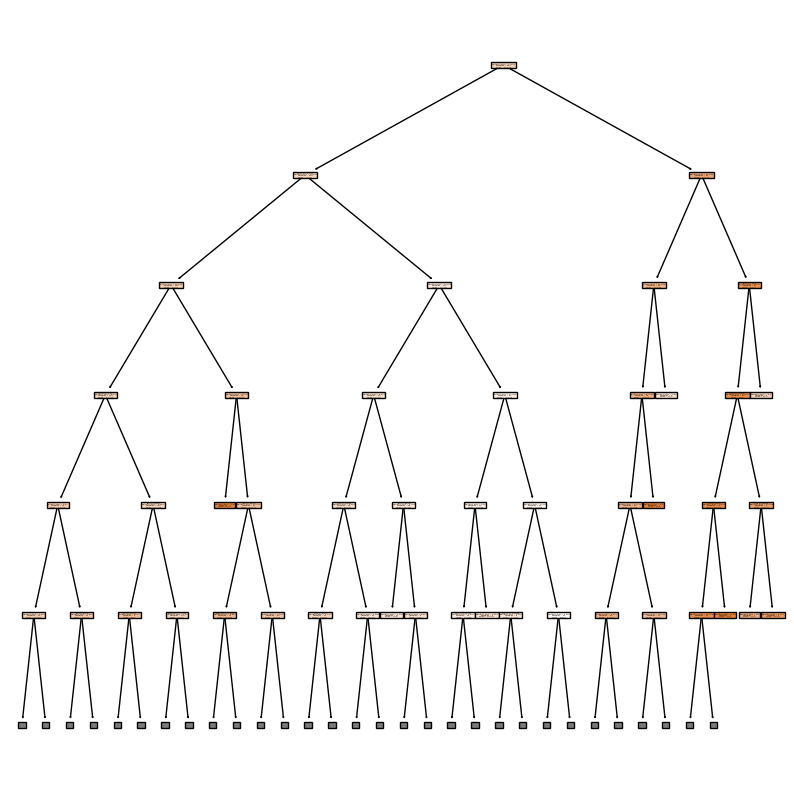

In [158]:
# visualização dos dados com "PLOT_TREE" com árvore com 5 nós de profundidade

plt.rc('figure', figsize=(10, 10))
tree.plot_tree(arvore_final, 
               max_depth=5,
               feature_names=X.columns.tolist(), 
               filled=True)
plt.show()